<table>
 <tr align=left><td><img align=left src="https://i.creativecommons.org/l/by/4.0/88x31.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
%matplotlib inline
#from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

# Convergence Results for Initial Value Problems

Convergence for IVPs is a bit different than with BVPs, we want in general
$$
    \lim_{\Delta t \rightarrow 0} U^N = u(t_f)
$$
where $t_f$ is the final desired time and $N$ is the number of time steps needed to reach $t_f$ such that
$$
    N \Delta t = t_f \quad \Rightarrow N = \frac{t_f}{\Delta t}.
$$

We need to be careful at this juncture however when we are talking about a convergent method.  A method can be convergent for a particular set of equations and particular initial conditions but not others.  Practically speaking we would like convergence results to apply to a reasonably large set of equations and initial conditions.  With these considerations we have the following definition of convergence for IVPs.

If applying an $r$-step method to an ODE of the form
$$
    u'(t) = f(t,u)
$$
with $f(t,u)$ Lipschitz continuous in $u$, and with any set of starting values satisfying
$$
    \lim_{\Delta t\rightarrow 0} U^\nu(\Delta t) = u_0 \quad \text{for} \quad \nu = 0, 1, \ldots, r-1
$$
(i.e. the bootstrap startup for the multi-step method is consistent with the initial value as $\Delta t \rightarrow$), then the method is said to be *convergent* in the sense
$$
    \lim_{\Delta t \rightarrow 0} U^N = u(t_f).
$$

As we saw previously for a method to be convergent it must be
 - **consistent** - the local truncation error $\tau = \mathcal{O}(\Delta t^p)$ where $p > 0$ and
 - **zero-stable** - a similar minimal form of stability implying that the sum total of the errors as $\Delta t \rightarrow 0$ is bounded and has the same order as $\tau$ which we know goes to zero as $\Delta t \rightarrow 0$.

## One-Step Method Convergence

Consider the simple linear problem
$$
    \frac{\text{d}u}{\text{d}t} = \lambda u + g(t) \quad \text{with}\quad u(0) = u_0
$$
which we know has the solution 
$$
    u(t) = u_0 e^{\lambda (t - t_0)} + \int^t_{t_0} e^{\lambda (t - \tau)} g(\tau) d\tau.
$$

### Forward Euler on a Linear Problem

Applying Euler's method to this problem leads to 
$$\begin{aligned}
    U^{n+1} &= U^n + \Delta t\lambda U^n \\
            &= (1 + \Delta t \lambda) U^n
\end{aligned}$$

We also know the local truncation error is
$$\begin{aligned}
    \tau^n &= \left (\frac{u(t_{n+1}) - u(t_n)}{\Delta t} \right ) - \lambda u(t_n)\\
    &= \left (u'(t_n) + \frac{1}{2} \Delta t u''(t_n) + \mathcal{O}(\Delta t^2) \right ) - u'(t_n) \\
    &= \frac{1}{2} \Delta t u''(t_n) + \mathcal{O}(\Delta t^2)
\end{aligned}$$

Noting the original definition of $\tau^n$ we can rewrite the expression for the local truncation error as

$$
    u(t_{n+1}) = (1 + \Delta t \lambda) u(t_n) + \Delta t \tau^n
$$

which in combination with the application of Euler's method leads to an expression for the global error

$$\begin{aligned}
    E^{n+1} = U^{n+1} - u(t^{n+1}) &= (1 + \Delta t \lambda) U^n - (1 + \Delta t \lambda) u(t_n) - \Delta t \tau^n \\
    &= (1+\Delta t \lambda) E^n - \Delta t \tau^n \\
\end{aligned}$$

Expanding this expression out backwards in time to $n=0$ leads to 

$$
    E^n = (1 + \Delta t \lambda) E^0 - \Delta t \sum^n_{i=1} (1 + \Delta t \lambda)^{n-i} \tau^{i - 1}.
$$

We can now see the importance of the term $(1 + \Delta t \lambda)$.  We can bound this term by

$$
    |1 + \Delta t \lambda| \leq e^{\Delta t \lambda}
$$

which then implies the term in the summation can be bounded by

$$
    |1 + \Delta t \lambda|^{n - i} \leq e^{(n-i) \Delta t |\lambda|} \leq e^{n \Delta t |\lambda||} \leq e^{|\lambda| t_f}
$$

Using this expression in the expression for the global error we find

$$\begin{aligned}
    E^n &= (1 + \Delta t \lambda) E^0 - \Delta t \sum^n_{i=1} (1 + \Delta t \lambda)^{n-i} \tau^{i - 1} \\
    |E^n| &\leq e^{|\lambda| \Delta t} |E^0| - \Delta t \sum^n_{i=1} e^{|\lambda| t_f} |\tau^{i - 1}| \\
          &\leq e^{|\lambda| t_f} \left(|E^0| - \Delta t \sum^n_{i=1} |\tau^{i - 1}|\right) \\
          &\leq e^{|\lambda| t_f} \left(|E^0| - n \Delta t \max_{1 \leq i \leq n} |\tau^{i - 1}|\right)
\end{aligned}$$

In other words the global error is bounded by the original global error and the maximum one-step error made multiplied by the number of time steps taken.  If $N = \frac{t_f}{\Delta t}$ as before and taking into account the local truncation error we can simplify this expression further to

$$
    |E^n| \leq e^{|\lambda| t_f} \left[|E^0| + t_f \left(\frac{1}{2} \Delta t |u''| + \mathcal{O}(\Delta t^2)\right ) \right]
$$

If we assume that we have used the correct initial condition $u_0$ then $E_0 \rightarrow 0$ as $\Delta t \rightarrow 0$ and we see that the method is truly convergent as 

$$
    |E^n| \leq e^{|\lambda| t_f} t_f \left(\frac{1}{2} \Delta t |u''| + \mathcal{O}(\Delta t^2)\right ) = \mathcal{O}(\Delta t).
$$

### Relation to Stability for BVPs

We can see the relationship between the previous version of stability and the one outlined above.  Try writing the forward Euler method as a linear system.

Forward Euler:
$$
    A = \frac{1}{\Delta t} \begin{bmatrix}
        1 \\
        -(1 + \Delta t \lambda) & 1 \\
        & -(1 + \Delta t \lambda) & 1 \\
        & & -(1 + \Delta t \lambda) & 1 \\
        & & & \ddots & \ddots \\
        & & & & -(1 + \Delta t \lambda) & 1 \\
        & & & & & -(1 + \Delta t \lambda) & 1
    \end{bmatrix}
$$
with
$$
    U = \begin{bmatrix} U^1 \\ U^2 \\ \vdots \\ U^N \end{bmatrix} ~~~~ 
    F = \begin{bmatrix} (1 / \Delta t + \lambda) U^0 + g(t_0) \\ g(t_1) \\ \vdots \\ g(t_{N-1}) \end{bmatrix}
$$

Following our previous stability result and taking $\hat{U~}$ to be the vector obtained from the true solution ($\hat{U~}^i = u(t_i)$) we then have
$$
    A U = F  ~~~~~~ A \hat{U~} = F + \tau
$$
and therefore
$$
    A (\hat{U~} - U) = \tau.
$$

Noting that $\hat{U~} - U = E$ we can then invert that matrix $A$ to find the relationship between the truncation error $\tau$ and the global error $E$.  As before then we require that $A^{-1}$ is invertible (which is trivial in this case) and that $||A^{-1}|| < C$ in some norm.  We can see this as
$$
    A^{-1} = \Delta t \begin{bmatrix}
        1 \\
        (1 + \Delta t \lambda) & 1 \\
        (1 + \Delta t \lambda)^2 & (1 + \Delta t \lambda) & 1 \\
        (1 + \Delta t \lambda)^3 & (1 + \Delta t \lambda)^2 & (1 + \Delta t \lambda) & 1\\
        \vdots & & & \ddots \\
        (1 + \Delta t \lambda)^{N-1} & (1 + \Delta t \lambda)^{N-2} (1 + \Delta t \lambda)^{N-3} & \cdots & (1 + \Delta t \lambda) & 1 
   \end{bmatrix}
$$
whose infinity norm is
$$
    ||A^{-1}||_\infty = \Delta t \sum^N_{m=1} | (1 + \Delta t \lambda)^{N-M} |
$$
and therefore
$$
    ||A^{-1}||_\infty \leq \Delta t N e^{|\lambda| T} = T e^{|\lambda| T}.
$$
As $\Delta t \rightarrow 0$ this is bounded for **fixed T**.

### General One-Step Method Convergence

Consider the general one step method denoted by
$$
    U^{n+1} = U^n + \Delta t \Phi(U^n, t_n, \Delta t).
$$

Assuming $\Phi$ is continuous in $t$ and $\Delta t$ and Lipschitz continous in $u$ with Lipschitz contsant $L$ (related to the Lipschitz constant of $f$).  If the one-step method is consistent
$$
    \Phi(u,t,0) = f(u,t)
$$
for all $u$, $t$, and $\Delta t$ and the local truncation error is
$$
    \tau^n =\frac{u(t_{n+1}) - u(t_n)}{\Delta t} - \phi(u(t_n), t_n, \Delta t)
$$
then the one-step method is convergent.  

Using the general approach we used for forward Euler we know that the true solution and $\tau$ are realted through
$$
    u(t_{n+1}) = u(t_n) + \Delta t \Phi(u(t_n), t_n, \Delta t) + \Delta t \tau^n
$$
which subtracted from the approximate solution
$$
    U^{n+1} = U^n + \Delta t \Phi(U^n, t_n, \Delta t)
$$
leads to
$$
    E^{n+1} = E^n + \Delta t (\Phi(U^n, t_n, \Delta t) - \Phi(u(t_n), t_n, \Delta t)) - \Delta t \tau^n.
$$

Using the Lipschitz continuity of $\Phi$ we then have
$$
    |E^{n+1}| \leq |E^n| + \Delta t L |E^n| + \Delta t |\tau^n|.
$$
which has the same form as we saw in the proof for forward Euler.

## Zero-Stability for Linear Multistep Methods

We can also make general statements for linear multistep methods although it is important to note that we have additional requirements for linear multistep methods so that they are convergent.  As an example consider the method
$$
    U^{n+2} - 3 U^{n+1} + 2 U^n = - \Delta t f(U^n)
$$
so that $\alpha_0 = 2$, $\alpha_1 = -3$, and $\alpha_2 = 1$ and $\beta_0 = -1$ with the rest equal to zero.  Note that these coefficients satisfy our conditions for being consistent with a truncation error
$$
    \tau^n = \frac{1}{\Delta t} (u(t_{n+2}) - 3 u(t_{n+1}) + 2 u(t_n) + \Delta t u'(t_n)) = \frac{5}{2} \Delta t u''(t_n) + \mathcal{O}(\Delta t^2).
$$
It turns out that although this method is consistent the global error does not converge in general!

$$
    U^{n+2} - 3 U^{n+1} + 2 U^n = - \Delta t f(U^n)
$$
Consider the above method with the trivial ODE
$$
    u'(t) = 0 \quad u(0) = 0
$$
so that we are left with the method
$$
    U^{n+2} - 3 U^{n+1} + 2 U^n = 0.
$$

If we have exact values for $U^0$ and $U^1$ then this method would lead to $U^n = 0$. In general however we only have an approximation to $U^1$ so what happens then?  We can solve the linear difference equation in terms of $U^0$ and $U^1$ to find
$$
    U^n = 2 U^0 - U^1 + 2^n (U^1 - U^0).
$$
If we assume a error on the order of $\mathcal{O}(\Delta t)$ for $U^1$ this quickly leads to large values even for small $n$!

### Characteristic Polynomials and Linear Difference Equations

As an short aside, say we wanted to solve

$$\sum^r_{j=0} \alpha_j U^{n+j} = 0$$

given initial conditions $U^0, U^1, \ldots, U^{r-1}$ which has a solution in the general form $U^n = \xi^n$.  

Plugging this into the equation we have
$$
    \sum^r_{j=0} \alpha_j \xi^{n+j} = 0
$$
which simplifies to
$$
    \sum^r_{j=0} \alpha_j \xi^j = 0 
$$

by dividing by $\xi^n$.  

If $\xi$ then is a root of the polynomial
$$
    \rho(\xi) = \sum^r_{j=0} \alpha_j \xi^j
$$
then $\xi$ solves the equation.

Note that since these are linear methods that a linear combination of solutions is also a solution so the general form of a solution has the form
$$
    U^n = c_1 \xi_1^n + c_2 \xi_2^n + \cdots + c_r \xi^n_r.
$$
Given initial values for $U^0, U^1, \ldots$ we can uniquely determine the $c_j$.

### General Zero-Stability Result for LMM

An $r$-step LMM is *zero-stable* if the roots of the characteristic polynomial $\rho(\xi)$ satisfy
$$
    |\xi_j| \leq 1 \quad \quad \text{for} \quad j=1,2,3,\ldots,r
$$
if $\xi_j$ is not repeated and $|\xi_j| < 1$ for repeated roots.

#### Example

Consider the linear multistep method
$$
    U^{n+2} - 2 U^{n+1} + U^n = \frac{\Delta t}{2} (f(U^{n+2}) - f(U^n)).
$$
Applying this to the ODE $u'(t) = 0$ leads to the difference equation
$$
    U^{n+2} - 2 U^{n+1} + U^n = 0
$$
whose characteristic polynomial is
$$
    \rho(\xi) = \xi^2 - 2 \xi + 1 = (\xi - 1)^2
$$
leading to the general solution
$$
    U^n = c_1 + c_2 n.
$$
Here we see that given a $U^0$ and $U^1$ that the solution will still grow linearly with $n$ which will again lead to a divergent solution.

#### Example

Consider the linear multistep method
$$
    U^{n+3} - 2 U^{n+2} + \frac{5}{4} U^{n+1} - \frac{1}{4} U^n = \frac{\Delta t}{4} f(U^n).
$$
Apply this to the ODE $u'(t) = 0$ and determine whether this method is zero-stable.

Applied to the ODE $u'(t) = 0$ we have the linear difference equation
$$
    U^{n+3} - 2 U^{n+2} + \frac{5}{4} U^{n+1} - \frac{1}{4} U^n = 0
$$
leading to 
$$
    \rho(\xi) = \xi^3 - 2 \xi^2 + \frac{5}{4} \xi - \frac{1}{4} = 0
$$
whose solutions are
$$
    \xi_1 = 1, \xi_2 = \xi_3 = 1 / 2
$$
with the general solution
$$
    U^n = c_1 + c_2 \frac{1}{2^n} + c_3 n \frac{1}{2^n}
$$
which does converge due to the factor of $1 / 2^n$!

### Example: Adams Methods

The general form for all Adams methods take the form
$$
    U^{n+r} = U^{n+r-1} + \Delta t \sum^r_{j=0} \beta_j f(U^{n+j})
$$
which has the characteristic polynomial (for the ODE $u'(t)=0$)
$$
    \rho(\xi) = \xi^r - \xi^{r-1} = (\xi - 1) \xi^{r-1}
$$
leading to the roots $\xi_1 = 1$ and $\xi_2 = \xi_3 = \cdots = \xi_r = 0$ which satisfy the general zero-stability result and therefore all Adams methods are convergent.

## Absolute Stability
Although zero-stability guarantees stability it is much more difficult to work with in general as the limit $\Delta t \rightarrow 0$ can be difficult to compute.  Instead we often consider a finite $\Delta t$ and examine if the method is stable for this particular choice of $\Delta t$.  This has the practical upside that it will also tell us what particular $\Delta t$ will ensure that our method is indeed stable.

### Example
Consider the problem

$$u'(t) = \lambda (u - \cos t) - \sin t \quad \text{with} \quad u(0) = 1$$

whose exact solution is 

$$u(t) = \cos t.$$

We can compute an estimate for what $\Delta t$ we need to use by examining the truncation error 

$$\begin{aligned}
    \tau &= \frac{1}{2} \Delta t u''(t) + \mathcal{O}(\Delta t^2) \\
      &= -\frac{1}{2} \Delta t \cos t + \mathcal{O}(\Delta t^2)
\end{aligned}$$

and therefore

$$|E^n| \leq \Delta t \max_{0 \leq t \leq t_f} |\cos t| = \Delta t.$$

If we want a solution where $|E^n| < 10^{-3}$ then $\Delta t \approx 10^{-3}$.  Turning to the application of Euler's method lets apply this to the case where $\lambda = -10$ and $\lambda = -2100$.

//anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
//anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
//anaconda/envs/keras/lib/python3.6/site-packages/numpy/ma/core.py:6667: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


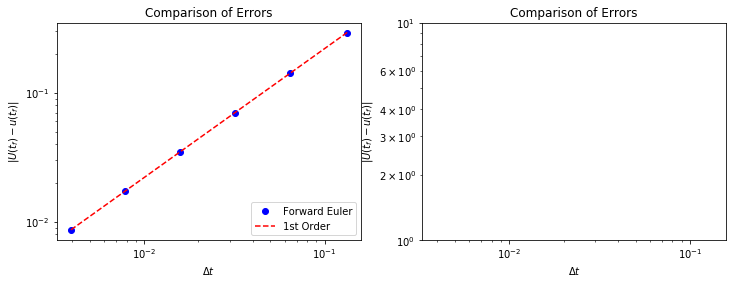

In [2]:
# Compare accuracy between Euler
f = lambda t, lam, u: lam * (u - numpy.cos(t)) - numpy.sin(t)
u_exact = lambda t: numpy.cos(t)

t_f = 2.0
num_steps = [2**n for n in range(4, 10)]
# num_steps = [2**n for n in range(15,20)]
delta_t = numpy.empty(len(num_steps))
error_10 = numpy.empty(len(num_steps))
error_2100 = numpy.empty(len(num_steps))

for (i, N) in enumerate(num_steps):
    t = numpy.linspace(0, t_f, N)
    delta_t[i] = t[1] - t[0]
    
    # Compute Euler solution
    U = numpy.empty(t.shape)
    U[0] = 1.0
    for (n, t_n) in enumerate(t[1:]):
        U[n+1] = U[n] + delta_t[i] * f(t_n, -10.0, U[n])
    error_10[i] = numpy.abs(U[-1] - u_exact(t_f)) / numpy.abs(u_exact(t_f))
    
    U = numpy.empty(t.shape)
    U[0] = 1.0
    for (n, t_n) in enumerate(t[1:]):
        U[n+1] = U[n] + delta_t[i] * f(t_n, -2100.0, U[n])
    error_2100[i] = numpy.abs(U[-1] - u_exact(t_f)) / numpy.abs(u_exact(t_f))
    
# Plot error vs. delta_t
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 2, 1)

axes.loglog(delta_t, error_10, 'bo', label='Forward Euler')

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_t, order_C(delta_t[1], error_10[1], 1.0) * delta_t**1.0, 'r--', label="1st Order")

axes.legend(loc=4)
axes.set_title("Comparison of Errors")
axes.set_xlabel("$\Delta t$")
axes.set_ylabel("$|U(t_f) - u(t_f)|$")

axes = fig.add_subplot(1, 2, 2)

axes.loglog(delta_t, error_2100, 'bo', label='Forward Euler')
axes.loglog(delta_t, order_C(delta_t[1], error_2100[1], 1.0) * delta_t**1.0, 'r--', label="1st Order")

axes.set_title("Comparison of Errors")
axes.set_xlabel("$\Delta t$")
axes.set_ylabel("$|U(t_f) - u(t_f)|$")

plt.show()

So what went wrong with $\lambda = -2100$?  The global error should go as

$$E^{n+1} = (1 + \Delta t \lambda) E^n - \Delta t T^n$$

If $\Delta t \approx 10^{-3}$ then for the case $\lambda = -10$ the previous global error is multiplied by

$$1 + 10^{-3} \cdot -10 = 0.99$$

which means the contribution from $E^n$ will slowly decrease as we take more time steps.  For the other case we have

$$1 + 10^{-3} \cdot -2100 = -1.1$$

which means that for this $\Delta t$ the error made in previous time steps will grow!  For this not to happen we would have to have $\Delta t < 1 / 2100$ which would lead to convergence again.

### Absolute Stability of the Forward Euler Method

Consider again the simple test problem $u'(t) = \lambda u$.  We know from before that applying Euler's method to this problem leads to an update of the form

$$U_{n+1} = (1 + \Delta t \lambda) U_n.$$

As may have been clear from the last example, we know that if

$$|1 + \Delta t \lambda| \leq 1$$

that the method will be stable, this is called **absolute stability**.  Note that the product of $\Delta t \lambda$ is what matters here and often we consider a **region of absolute stability** on the complex plain defined by the equation outlined where now $z = \Delta t \lambda$.  This allows the values of $\lambda$ to be complex which can be an important case to consider, especially for systems of equations where the $\lambda$s are identified as the eigenvalues.

In [ ]:
# Plot the region of absolute stability for Forward Euler
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

t = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

axes.fill(numpy.cos(t) - 1.0, numpy.sin(t), 'b')
axes.plot([-3, 3],[0.0, 0.0],'k--')
axes.plot([0.0, 0.0],[-3, 3],'k--')
axes.set_xlim((-3, 3.0))
axes.set_ylim((-3,3))
axes.set_aspect('equal')

axes.set_title("Absolute Stability Region for Forward Euler")
plt.show()

### General Stability Regions for Linear Multistep Methods

Going back to linear multistep methods and applying them in general to our test problem we have
$$
    \sum^r_{j=0} \alpha_j U_{n+j} = \Delta t \sum^r_{j=0} \beta_j \lambda U_{n+j}
$$
which can be written as 
$$
    \sum^r_{j=0} (\alpha_j - \beta_j \Delta t \lambda) U_{n+j} = 0
$$
or using our notation of $z = \Delta t \lambda$ we have
$$
    \sum^r_{j=0} (\alpha_j - \beta_j z) U_{n+j} = 0.
$$

This has a similar form to the linear difference equations considered above!  Letting
$$
    \rho(\xi) = \sum^r_{j=0} \alpha_j \xi^j
$$
and 
$$
    \sigma(\xi) = \sum^r_{j=0} \beta_j \xi^j
$$
we can write the expression above as
$$
    \pi(\xi, z) = \rho(\xi) - z \sigma(\xi)
$$
called the **stability polynomial** of the the linear multi-step method.  

It turns out that if the roots $\xi_i$ of this polynomial satisfy
$$
    |\xi_i| \leq 1
$$
then the multi-step method is absolutely-stable.  We then define the region of absolute stability as the values for $z$ for which this is true.  This approach can also be applied to one-step methods.

### Example:  Forward Euler's Method

Examining forward Euler's method we have

$$\begin{aligned}
    0 &= U_{n+1} - U_n - \Delta t \lambda U_n \\
    &= U_{n+1} - U_n (1 + \Delta t \lambda)\\
    &= \xi - 1 (1 + z)\\
    &=\pi(\xi, z)
\end{aligned}$$

whose root is $\xi = 1 + z$ and we have re-derived the stability region we had found before.

### Absolute Stability of the backward Euler Method

The backward version of Euler's method is defined as
$$
    U_{n+1} = U_n + \Delta t f(t_{n+1}, U_{n+1}).
$$
Check to see if backward Euler is absolute stable.

If we again consider the test problem from before we find that
$$\begin{aligned}
    0 &= U_{n+1} (1 - \Delta t \lambda) - U_n \\
    &= \xi (1 - z) - 1
\end{aligned}$$
which has the root $\xi = \frac{1}{1 - z}$.  We then have
$$
    \left|\frac{1}{1-z}\right| \leq 1 \leftrightarrow |1 - z| \geq 1
$$
so in fact the stability region encompasses the entire complex plane except for a circle centered at $(1, 0)$ of radius 1 implying that the backward Euler method is in fact stable for any choice of $\Delta t$.

<font color = "red">
    Usually negative eigenvalues lead to stability in physical system (e.g. waves).

## Application to Stiff ODEs

Consider again the ODE we examined before

$$u'(t) = \lambda (u - \cos t) - \sin t$$

except this time with general initial condition $u(t_0) = \eta$.  What happens to solutions that are slightly different from $\eta = 1$ or $t_0 = 0$?  The general solution of the ODE is

$$u(t) = e^{\lambda (t - t_0)} (\eta - \cos t_0)) + \cos t$$.

In [ ]:
# Plot "hairy" solutions to the ODE
u = lambda t_0, eta, lam, t: numpy.exp(lam * (t - t_0)) * (eta - numpy.cos(t_0)) + numpy.cos(t)

fig = plt.figure()

for lam in [-1, -10]:
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    for eta in numpy.linspace(-1, 1, 10):
        for t_0 in numpy.linspace(0.0, 9.0, 10):
            t = numpy.linspace(t_0,10.0,100)
            axes.plot(t, u(t_0, eta, lam, t),'b')
    t = numpy.linspace(0.0,10.0,100)
    axes.plot(t, numpy.cos(t), 'r', linewidth=5)
        
    axes.set_title("Perturbed Solutions $\lambda = %s$" % lam)
    axes.set_xlabel('$t$')
    axes.set_ylabel('$u(t)$')
plt.show()

In [ ]:
# Plot "inverse hairy" solutions to the ODE
u = lambda t_0, eta, lam, t: numpy.exp(lam * (t - t_0)) * (eta - numpy.cos(t_0)) + numpy.cos(t)

fig = plt.figure()
num_steps = 10
error = numpy.ones(num_steps) * 1.0
t_hat = numpy.linspace(0.0, 10.0, num_steps + 1)
t_whole = numpy.linspace(0.0, 10.0, 1000)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
eta = 1.0
lam = 0.1

for n in range(1,num_steps):
    t = numpy.linspace(t_hat[n-1], t_hat[n], 100)
    U = u(t_hat[n-1], eta, lam, t)
    axes.plot(t, U, 'b')
    axes.plot(t_whole, u(t_hat[n-1], eta, lam, t_whole),'b--')
    axes.plot([t[-1], t[-1]], (U[-1], U[-1] + -1.0**n * error[n]), 'r')
    eta = U[-1] + -1.0**n * error[n]

t = numpy.linspace(0.0, 10.0, 100)
axes.plot(t, numpy.cos(t), 'g')

axes.set_title("Perturbed Solutions $\lambda = %s$" % lam)
axes.set_xlabel('$t$')
axes.set_ylabel('$u(t)$')
axes.set_ylim((-10,10))
plt.show()

### Example:  Chemical systems

Consider the transition of a chemical $A$ to a chemical $C$ through the process

$$A \overset{K_1}{\rightarrow} B \overset{K_2}{\rightarrow} C.$$

If we let

$$\vec{u} = \begin{bmatrix} [A] \\ [B] \\ [C] \end{bmatrix}$$

then we can model this simple chemical reaction with the system of ODEs

$$\frac{\text{d} \vec{u}}{\text{d} t} = 
\begin{bmatrix}
    -K_1 & 0 & 0 \\
    K_1 & -K_2 & 0 \\
    0 & K_2 & 0
\end{bmatrix} \vec{u}$$

The solution of this system is of the form

$$u_j(t) = c_{j1} e^{-K_1 t} + c_{j2}e^{-K_2 t} + c_{j3}$$

In [ ]:
# Solve the chemical systems example
# Problem parameters
K_1 = 3
K_2 = 1
# K_1 = 30.0
# K_2 = 1.0

A = numpy.array([[-K_1, 0, 0], [K_1, -K_2, 0], [0, K_2, 0]])
f = lambda u: numpy.dot(A, u)

t = numpy.linspace(0.0, 8.0, 128)
delta_t = t[1] - t[0]

U = numpy.empty((t.shape[0], 3))
U[0, :] = [2.5, 5.0, 2.0]

for n in range(t.shape[0] - 1):
    U[n+1, :] = U[n, :] + delta_t * f(U[n, :])
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t, U)

axes.set_title("Chemical System")
axes.set_xlabel("$t$")
axes.set_title("$[A], [B], [C]$")
axes.set_ylim((0.0, 10.))

plt.show()

### What is stiffness?

In general a **stiff** ODE is one where $u'(t) \ll f'(t, u)$.  For systems of ODEs the **stiffness ratio**

$$\frac{\max_p |\lambda_p|}{\min_p |\lambda_p|}$$

can be used to characterize the stiffness of the system.  In our last example this ratio was $K_1 / K_2$ if $K_1 > K_2$.  As we increased this ratio we observed that the numerical method became unstable only a reduction in $\Delta t$ lead to stable solution again.  For explicit time step methods this is problematic as the reduction of the time step for only one of the species leads to very expensive evaluations.  For example, forward Euler has the stability criteria

$$|1 + \Delta t \lambda| < 1$$

where $\lambda$ will have to be the maximum eigenvalue of the system.  

In [ ]:
# Plot the region of absolute stability for Forward Euler
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

t = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

K_1 = 3.0
K_2 = 1.0
delta_t = 1.0
eigenvalues = [-K_1, -K_2]

axes.fill(numpy.cos(t) - 1.0, numpy.sin(t), color='lightgray')
for lam in eigenvalues:
    print(lam * delta_t)
    axes.plot(lam * delta_t, 0.0, 'ko')
axes.plot([-3, 3],[0.0, 0.0],'k--')
axes.plot([0.0, 0.0],[-3, 3],'k--')
# axes.set_xlim((-3, 1))
axes.set_ylim((-2,2))
axes.set_aspect('equal')

axes.set_title("Absolute Stability Region for Forward Euler")
plt.show()

### A-Stability
What if we could expand the absolute stability region to encompass more of the left-half plane or even better, all of it.  A method that has this property is called **A-stable**.  We have already seen one example of this with backward Euler which has a stability region of

$$|1 - z| \geq 1$$

which covers the full left-half plane.  

It turns out that for linear multi-step methods a theorem by Dahlquist proves that there are no LMMs that satisfies the A-stability criterion beyond second order (trapezoidal rule).  There are higher-order Runge-Kutta methods do however.

Perhaps this is too restrictive though.  Often large eigenvalues for systems (for instance coming from a PDE discretization for the heat equation) lie completely on the real line.  If the stability region can encompass as much of the real line as possible while leaving out the rest of the left-half plane we can possibly get a more efficient method.  There are a number of methods that can be constructed that have this property but are higher-order.

In [ ]:
# Plot the region of absolute stability for Backward Euler
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

t = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

K_1 = 3.0
K_2 = 1.0
delta_t = 1.0
eigenvalues = [-K_1, -K_2]

axes.set_facecolor('lightgray')
axes.fill(numpy.cos(t) + 1.0, numpy.sin(t), 'w')
for lam in eigenvalues:
    print(lam * delta_t)
    axes.plot(lam * delta_t, 0.0, 'ko')
axes.plot([-3, 3],[0.0, 0.0],'k--')
axes.plot([0.0, 0.0],[-3, 3],'k--')
# axes.set_xlim((-3, 1))
axes.set_ylim((-2,2))
axes.set_aspect('equal')

axes.set_title("Absolute Stability Region for Backward Euler")
plt.show()

### L-Stability

It turns out not all A-stable methods are alike.  Consider the backward Euler method and the trapezoidal method.  The stability polynomial for the trapezoidal method is
$$\begin{aligned}
    0 &= U_{n+1} - U_n - \Delta t \frac{1}{2} (\lambda U_n + \lambda U_{n+1}) \\
      &= U_{n+1}\left(1 - \frac{1}{2} \Delta t \lambda \right ) - U_n \left(1 + \frac{1}{2}\Delta t \lambda \right) \\
      &= \left(\xi - \frac{1 + \frac{1}{2}z}{1 - \frac{1}{2} z}\right) \left(1 - \frac{1}{2} z \right )\\
\end{aligned}$$
which shows that it is A-stable.  Lets apply both these methods to a problem we have seen before and see what happens.

In [ ]:
# Compare accuracy between Euler
f = lambda t, lam, u: lam * (u - numpy.cos(t)) - numpy.sin(t)
u_exact = lambda t_0, eta, lam, t: numpy.exp(lam * (t - t_0)) * (eta - numpy.cos(t_0)) + numpy.cos(t)

t_0 = 0.0
eta = 1.5
lam = -1e6

num_steps = [10, 20, 40, 50]

delta_t = numpy.empty(len(num_steps))
error_euler = numpy.empty(len(num_steps))
error_trap = numpy.empty(len(num_steps))

for (i, N) in enumerate(num_steps):
    t = numpy.linspace(0, t_f, N)
    delta_t[i] = t[1] - t[0]
    u = u_exact(t_0, eta, lam, t_f)
    
    # Compute Euler solution
    U_euler = numpy.empty(t.shape)
    U_euler[0] = eta
    for (n, t_n) in enumerate(t[1:]):
        U_euler[n+1] = (U_euler[n] - lam * delta_t[i] * numpy.cos(t_n) - delta_t[i] * numpy.sin(t_n)) / (1.0 - lam * delta_t[i])
    error_euler[i] = numpy.abs(U_euler[-1] - u) / numpy.abs(u)
    
    # Compute using trapezoidal
    U_trap = numpy.empty(t.shape)
    U_trap[0] = eta
    for (n, t_n) in enumerate(t[1:]):
        U_trap[n+1] = (U_trap[n] + delta_t[i] * 0.5 * f(t_n, lam, U_trap[n]) - 0.5 * lam * delta_t[i] * numpy.cos(t_n) - 0.5 * delta_t[i] * numpy.sin(t_n)) / (1.0 - 0.5 * lam * delta_t[i])
    error_trap[i] = numpy.abs(U_trap[-1] - u)
    
# Plot error vs. delta_t
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 2, 1)
axes.plot(t, U_euler, 'ro-')
axes.plot(t, u_exact(t_0, eta, lam, t),'k')

axes = fig.add_subplot(1, 2, 2)
axes.loglog(delta_t, error_euler, 'bo')
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_t, order_C(delta_t[1], error_euler[1], 1.0) * delta_t**1.0, 'r--', label="1st Order")
axes.loglog(delta_t, order_C(delta_t[1], error_euler[1], 2.0) * delta_t**2.0, 'b--', label="2nd Order")

axes.legend(loc=4)
axes.set_title("Comparison of Errors for Backwards Euler")
axes.set_xlabel("$\Delta t$")
axes.set_ylabel("$|U(t_f) - u(t_f)|$")

# Plots for trapezoid
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 2, 1)
axes.plot(t, U_trap, 'ro-')
axes.plot(t, u_exact(t_0, eta, lam, t),'k')

axes = fig.add_subplot(1, 2, 2)
axes.loglog(delta_t, error_trap, 'bo', label='Forward Euler')
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_t, order_C(delta_t[1], error_trap[1], 1.0) * delta_t**1.0, 'r--', label="1st Order")
axes.loglog(delta_t, order_C(delta_t[1], error_trap[1], 2.0) * delta_t**2.0, 'b--', label="2nd Order")

axes.legend(loc=4)
axes.set_title("Comparison of Errors for Trapezoidal Rule")
axes.set_xlabel("$\Delta t$")
axes.set_ylabel("$|U(t_f) - u(t_f)|$")

plt.show()

It turns out that if we look at a one-step method and define the following ratio

$$U_{n+1} = R(z) U_n$$

we can define another form of stability, called **L-stability**, where we require that the method is A-stable and that

$$\lim_{z \rightarrow \infty} |R(z)| = 0.$$

Backwards Euler is L-stable while the trapezoidal method is not.

## Backward Differencing Formulas

A class of LMM methods that are useful for stiff ODE problems are the backward difference formula (BDF) methods which have the form

$$\alpha_0 U_n + \alpha_1 U_{n+1} + \cdots + \alpha_r U_{n+r} = \Delta \beta_r f(U_{n+r})$$

These methods can be derived directly from backwards finite differences from the point $U_{n+r}$ and the rest of the points back in time.  One can then derive r-step methods that are rth-order accurate this way.  Some of the methods are 

$$\begin{aligned}
    r = 1:& & U_{n+1} - U_n = \Delta t f(U_{n+1}) \\
    r = 2:& &3 U_{n+2} - 4 U_{n+1} + U_n = 2 \Delta t f(U_{n+1}) \\
    r = 3:& &11U_{n+3} - 18U_{n+2} + 9U_{n+1} - 2 U_n = 6 \Delta t f(U_{n+3}) \\
    r = 4:& &25 U_{n+4} - 48 U_{n+3} +36 U_{n+2} -16 U_{n+1} +3 U_n = 12 \Delta t f(U_{n+4})
\end{aligned}$$

## Plotting Stability Regions

If we think of the roots of the stability polynomial $\xi_j$ as complex numbers and write them in exponential form 
$$
    \xi_j = |\xi_j| e^{i \theta}.
$$

Here $|\xi_j|$ is the modulus (or magnitude) or the complex number and is defined as $|\xi_j| = x^2 + y^2$ where $\xi_j = x + i j$.  If the $\xi_j$s are on the boundary of the absolute stability region then we know that $|\xi_j| = 1$.  Using this in conjunction with the stability polynomial then leads to 
$$
    \rho(e^{i\theta}) - z \sigma(e^{i\theta}) = 0
$$
which solving for $z$ leads to
$$
    z(\theta) = \frac{\rho(e^{i\theta})}{\sigma(e^{i\theta})}.
$$

As an example consider the Adams-Bashforth 2-stage method.  The stability polynomial can be found as
$$\begin{aligned}
    U_{n+2} &= U_{n+1} + \frac{\Delta t}{2} (-f(U_n) + 3 f(U_{n+1})) \\
    \pi(\xi, z) &= U_{n+2} - U_{n+1} - \frac{\Delta t}{2} (-f(U_n) + 3 f(U_{n+1})) = 0 \\
    &= U_{n+2} - U_{n+1} - \frac{1}{2} (\Delta t \lambda U_n - 3 \Delta t \lambda U_{n+1}) \\
    &= 2 \xi^2 - 2 \xi + 3 z\xi - z \\
    &= \rho(\xi, z) + z \sigma(\xi, z)
\end{aligned}$$
where
$$
    \rho(\xi) = 2 ( \xi - 1) \xi ~~~ \text{and} ~~~ \sigma(\xi) = 3 \xi - 1
$$
so that
$$
    z(\theta) = \frac{2 (\xi - 1) \xi}{3 \xi - 1}.
$$

This does not necessarily ensure that given a $\theta$ that $z(\theta)$ will lie on the absolute stability region's boundary.  This can occur when $\xi_j = 1$ but to the left and right of the curve $\xi_j > 1$ and so therefore does not mark the boundary of the region.  To determine whether a particular region outlined by this curve is inside or outside of the stability region we can evaluate all the roots of $\pi(\xi, z)$ at some $z$ inside of the region in question and see if then $\forall j, \xi_j < 1$.

For one-step methods this becomes easier, if we look at the ratio $R(z)$ we defined earlier as
$$
    U_{n+1} = R(z) U_n
$$
in the case of the pth order Taylor series method applied to $u'(t) = \lambda u$ we get

$$\begin{aligned}
    U_{n+1} &= U_n + \Delta t \lambda U_n + \frac{1}{2}\Delta t^2 \lambda^2 U_n + \cdots + \frac{1}{p!}\Delta t^p \lambda^p U_n \\
    &=\left(1 + z + \frac{1}{2} z^2 + \frac{1}{6} z^3 + \cdots +\frac{1}{p!}z^p\right) U_n \Rightarrow \\
    R(z) &= 1 + z + \frac{1}{2} z^2 + \frac{1}{6} z^3 + \cdots +\frac{1}{p!}z^p.
\end{aligned}$$

Setting $R(z) = e^{i\theta}$ could lead to a way for solving for the boundary but (where $|R(z)| = 1$) but this is very difficult to do in general.  Instead if we plot the contours of $R(z)$ in the complex plain we can pick out the $R(z)=1$ contour and plot that.

In [ ]:
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

# ==================================
#  Forward euler
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.set_figheight(fig.get_figheight() * 2.0)
axes = fig.add_subplot(2, 2, 1)
x = numpy.linspace(-2, 2, 100)
y = numpy.linspace(-2, 2, 100)
X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

# Evaluate which regions are actually in stability region
print("Forward Euler's method - Stability region tests")
z = -1 + 1j * 0
print("  Inside of circle: ", numpy.abs(1.0 + z))
z = -3 + 1j * 0
print("  Outside of circle: ", numpy.abs(1.0 + z))

axes.contour(X, Y, numpy.abs(1.0 + Z), levels=[1.0])
axes.plot(x, numpy.zeros(x.shape),'k')
axes.plot(numpy.zeros(y.shape), y,'k')
axes.set_aspect('equal')
axes.set_title("Forward Euler")

# ==================================
#  Backwards Euler
axes = fig.add_subplot(2, 2, 2)
x = numpy.linspace(-2, 2, 100)
y = numpy.linspace(-2, 2, 100)
X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

# Evaluate which regions are actually in stability region
print("Backward Euler's method - Stability region tests")
z = 1 + 1j * 0
print("  Inside of circle: ", numpy.abs(1.0 + z))
z = -1 + 1j * 0
print("  Outside of circle: ", numpy.abs(1.0 + z))

axes.contour(X, Y, numpy.abs(1.0 / (1.0 - Z)), levels=[1.0])
axes.plot(x, numpy.zeros(x.shape),'k')
axes.plot(numpy.zeros(y.shape), y,'k')
axes.set_aspect('equal')
axes.set_title("Backwards Euler")

# ==================================
#  Taylor series method of order 4
axes = fig.add_subplot(2, 2, 3)
x = numpy.linspace(-5, 5, 100)
y = numpy.linspace(-5, 5, 100)
X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

# Evaluate which regions are actually in stability region
print("Taylor series method of order 4 - Stability region tests")
z = -1 + 1j * 0
print("  Inside of strange region: ", numpy.abs(1.0 + z))
z = -4 + 1j * 0
print("  Outside of strange region: ", numpy.abs(1.0 + z))

axes.contour(X, Y, numpy.abs(1 + Z + 0.5 * Z**2 + 1.0/6.0 * Z**3 + 1.0 / 24.0 * Z**4), levels=[1.0])
axes.plot(x, numpy.zeros(x.shape),'k')
axes.plot(numpy.zeros(y.shape), y,'k')
axes.set_aspect('equal')
axes.set_title("4th Order Taylor Series")

# ==================================
# 2-step Adams-Bashforth
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
xi = numpy.exp(1j * theta)

rho_2AB = lambda xi: (xi - 1.0) * xi
sigma_2AB = lambda xi: (3.0 * xi - 1.0) / 2.0
z_2AB = rho_2AB(xi) / sigma_2AB(xi)
z = rho_2AB(xi) / sigma_2AB(xi)

axes = fig.add_subplot(2, 2, 4)
axes.plot(z_2AB.real, z_2AB.imag)
axes.plot(x, numpy.zeros(x.shape),'k')
axes.plot(numpy.zeros(y.shape), y,'k')
axes.set_title("2-step Adams-Bashforth")
axes.set_aspect('equal')
axes.set_xlim([-2, 3])
axes.set_ylim([-2, 2])

plt.show()